In [1]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/AI Assignment/dataset.csv

Mounted at /content/drive


In [2]:
%matplotlib inline 
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI Assignment/dataset.csv')
data.groupby('Churn').count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
False,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859
True,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3342 non-null   object 
 1   Account length          3342 non-null   int64  
 2   Area code               3342 non-null   int64  
 3   International plan      3342 non-null   object 
 4   Voice mail plan         3342 non-null   object 
 5   Number vmail messages   3342 non-null   int64  
 6   Total day minutes       3342 non-null   float64
 7   Total day calls         3342 non-null   int64  
 8   Total day charge        3342 non-null   float64
 9   Total eve minutes       3342 non-null   float64
 10  Total eve calls         3342 non-null   int64  
 11  Total eve charge        3342 non-null   float64
 12  Total night minutes     3342 non-null   float64
 13  Total night calls       3342 non-null   int64  
 14  Total night charge      3342 non-null   

Objects cols are:
- Churn
- Voice mail plan (Bool)
- International Plan (bool)
- State

In [5]:
#Encode Bool and cat
cate = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['bool', 'object']]
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [6]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,11,1330,510,0,0,0,217.1,615,16.95,1752.4,101,17.11,189.7,103,11.49,95.7,83,29.10,30,0
3338,17,1350,415,0,1,0,1308.3,90,337.50,1272.9,112,127.00,223.5,756,75.90,6.8,6,20.10,0,0
3339,11,1296,415,0,0,17,167.8,627,14.04,1320.7,656,24.85,244.4,131,9.45,7.1,91,26.40,0,0
3340,18,149,2185,0,0,0,222.8,496,327.30,160.9,796,160.60,1347.4,123,11.55,92.7,90,17.50,27,0


In [7]:
data = data.drop('Account length', 1)
data = data.drop('Area code', 1)
data = data.drop('State', 1) #Just for test reasons

In [8]:
subset = data.sample(n=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



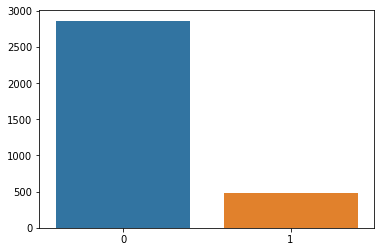

In [9]:
#Imbalanced response var

y = data["Churn"].value_counts()
unbalanced_y = sns.barplot(y.index, y.values)
unbalanced_y.figure.savefig("unbalanced_y.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

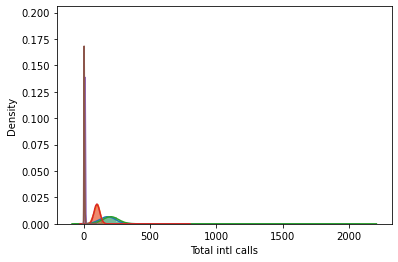

In [10]:
# Distribution
distro = ['Total day minutes','Total day calls', 'Total eve minutes', 'Total eve calls', 'Total intl minutes', 'Total intl calls']
Skew, Kurt = [], []
for column in distro:
    sns.distplot(subset[column])
    Skew.append("Skewness coeff. for {} is: {}".format(column, subset[column].skew()))
    Kurt.append("Kurtosis coeff. for {} is: {}".format(column, subset[column].kurt()))


In [11]:
Skew

['Skewness coeff. for Total day minutes is: 11.33528478974122',
 'Skewness coeff. for Total day calls is: 9.350439670661176',
 'Skewness coeff. for Total eve minutes is: 11.715791771919983',
 'Skewness coeff. for Total eve calls is: 11.37857932764967',
 'Skewness coeff. for Total intl minutes is: 11.028750763921547',
 'Skewness coeff. for Total intl calls is: 13.160100449913873']

In [12]:
Kurt

['Kurtosis coeff. for Total day minutes is: 212.0213602441138',
 'Kurtosis coeff. for Total day calls is: 137.16466831148446',
 'Kurtosis coeff. for Total eve minutes is: 175.61223834988297',
 'Kurtosis coeff. for Total eve calls is: 183.1456621276083',
 'Kurtosis coeff. for Total intl minutes is: 196.33590232635845',
 'Kurtosis coeff. for Total intl calls is: 242.12810675324485']

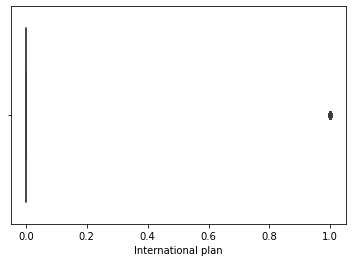

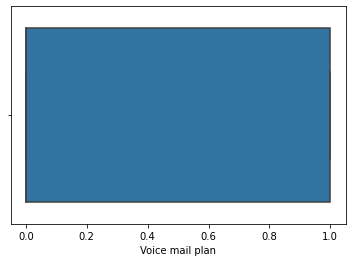

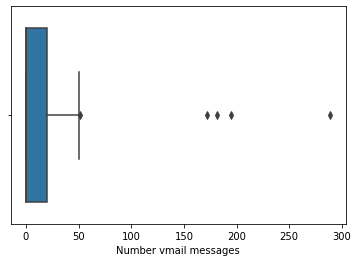

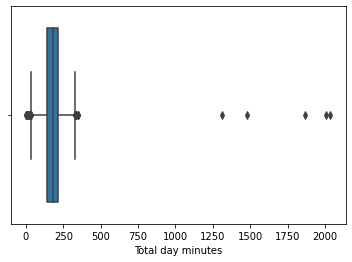

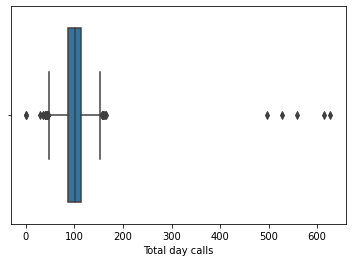

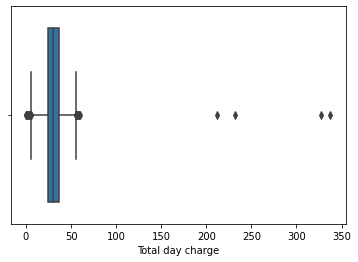

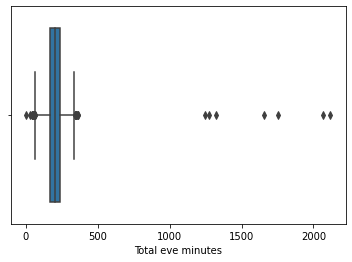

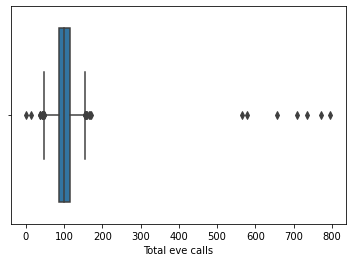

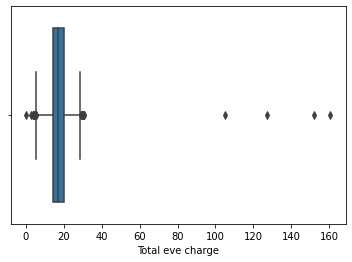

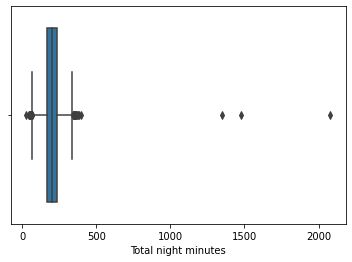

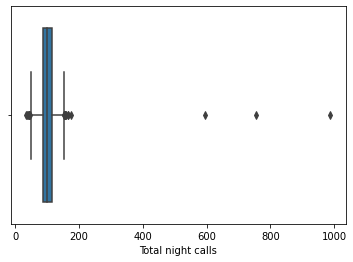

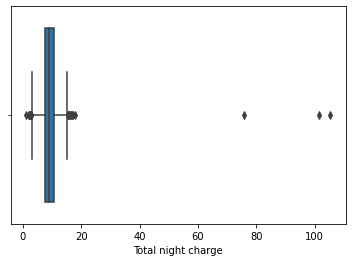

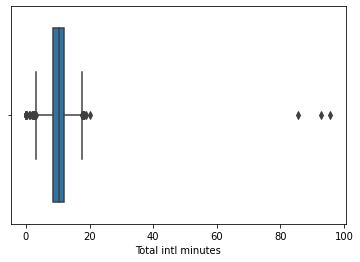

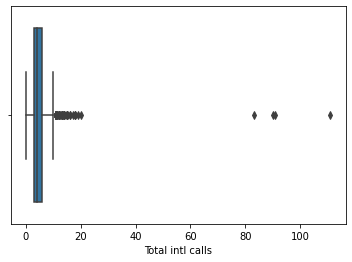

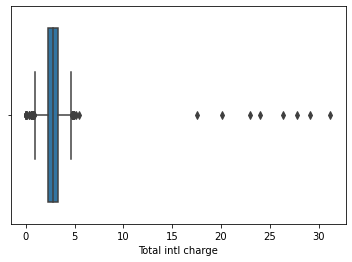

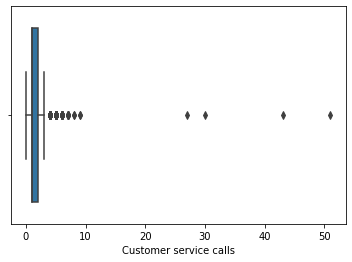

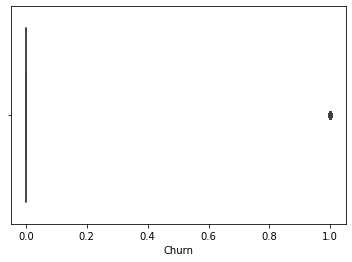

In [13]:
for column in data:
  sns.boxplot(x=data[column])
  plt.show()

## Outliers removal

International Plan - no -> bool
Churn - no -> bool
Voice mail plan - no -> bool

In [ ]:
# To test later
data.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

In [16]:
cols = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total intl minutes'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
data.groupby('Churn').count()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
0,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705,2705
1,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447


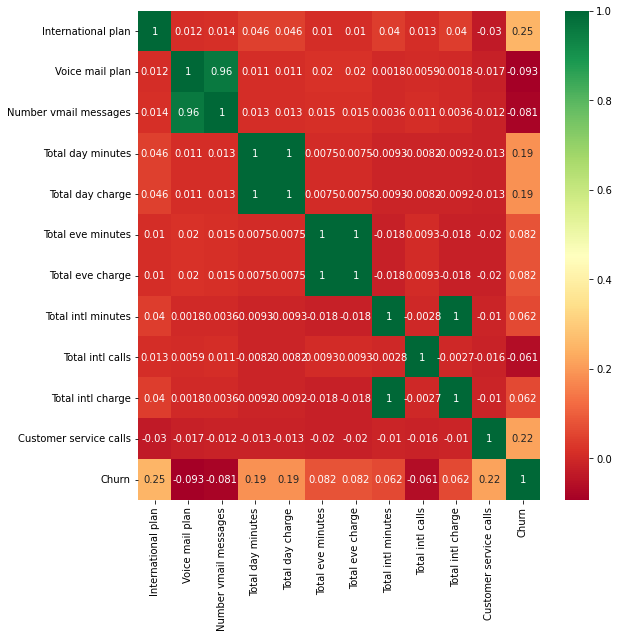

In [18]:
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["Churn"])>0.06]
plt.figure(figsize=(9,9))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
## Missing Values
total_null = data.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Churn,0,0.0
Total eve calls,0,0.0
Voice mail plan,0,0.0
Number vmail messages,0,0.0
Total day minutes,0,0.0
Total day calls,0,0.0
Total day charge,0,0.0
Total eve minutes,0,0.0
Total eve charge,0,0.0
Customer service calls,0,0.0


In [20]:
# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
y = data['Churn']
data = data.drop(['Churn'],axis=1)
xtrain, xvalid, ytrain, yvalid = train_test_split(data, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [22]:
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(2521, 16) (631, 16) (2521,) (631,)


In [23]:
full_train = pd.concat([xtrain, ytrain], axis=1)

In [24]:
full_valid = pd.concat([xvalid, yvalid], axis=1)

In [25]:
full_train

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1213,1,0,0,46.5,104,7.91,186.0,114,15.81,167.5,95,7.54,9.6,4,2.59,4,1
77,0,0,0,124.3,100,21.13,173.0,107,14.71,253.2,62,11.39,7.9,9,2.13,1,0
3082,0,0,0,240.1,115,40.82,180.4,91,15.33,133.4,122,6.00,8.0,6,2.16,3,0
1539,0,0,0,199.2,124,33.86,126.0,86,10.71,289.2,135,13.01,7.6,3,2.05,1,0
865,0,0,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0,1,28,221.6,74,37.67,288.4,100,24.51,240.3,105,10.81,9.0,2,2.43,1,0
3135,0,0,0,197.0,79,33.49,201.0,114,17.09,151.2,111,6.80,11.6,5,3.13,1,0
2550,0,0,0,141.4,128,24.04,146.4,70,12.44,123.0,75,5.54,8.1,4,2.19,0,0
2519,0,0,0,131.9,96,22.42,167.6,107,14.25,205.9,106,9.27,14.7,5,3.97,3,0


In [26]:
full_valid

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
942,0,0,0,194.8,97,33.12,235.3,118,20.00,174.4,126,7.85,11.0,3,2.97,1,0
696,0,0,0,124.1,82,21.10,202.6,120,17.22,289.6,119,13.03,6.7,8,1.81,3,0
1068,0,0,0,136.1,120,23.14,204.2,103,17.36,228.2,90,10.27,11.3,4,3.05,1,0
189,1,0,0,312.0,109,53.04,129.4,100,11.00,217.6,74,9.79,10.5,2,2.84,0,1
426,0,1,37,163.5,77,27.80,203.1,102,17.26,232.0,87,10.44,7.8,4,2.11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0,1,46,214.1,62,36.40,200.9,111,17.08,246.8,126,11.11,9.2,6,2.48,0,0
2135,0,0,0,219.2,73,37.26,167.0,65,14.20,161.4,119,7.26,10.0,5,2.70,1,0
307,1,0,0,165.5,84,28.14,286.2,112,24.33,198.9,89,8.95,11.5,2,3.11,1,1
41,0,1,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0


In [27]:
xtrain.to_csv('xtrain.csv')
ytrain.to_csv('ytrain.csv')
xvalid.to_csv('xvalid.csv')
yvalid.to_csv('yvalid.csv')
full_train.to_csv('full_train.csv')
full_valid.to_csv('full_valid.csv')

In [28]:
ytrain_ls, yvalid_ls = ytrain.tolist(), yvalid.tolist() 

In [29]:
ytrain_ls = set(ytrain_ls)
ytrain_ls

{0, 1}

In [30]:
yvalid_ls = set(yvalid_ls)
yvalid_ls

{0, 1}

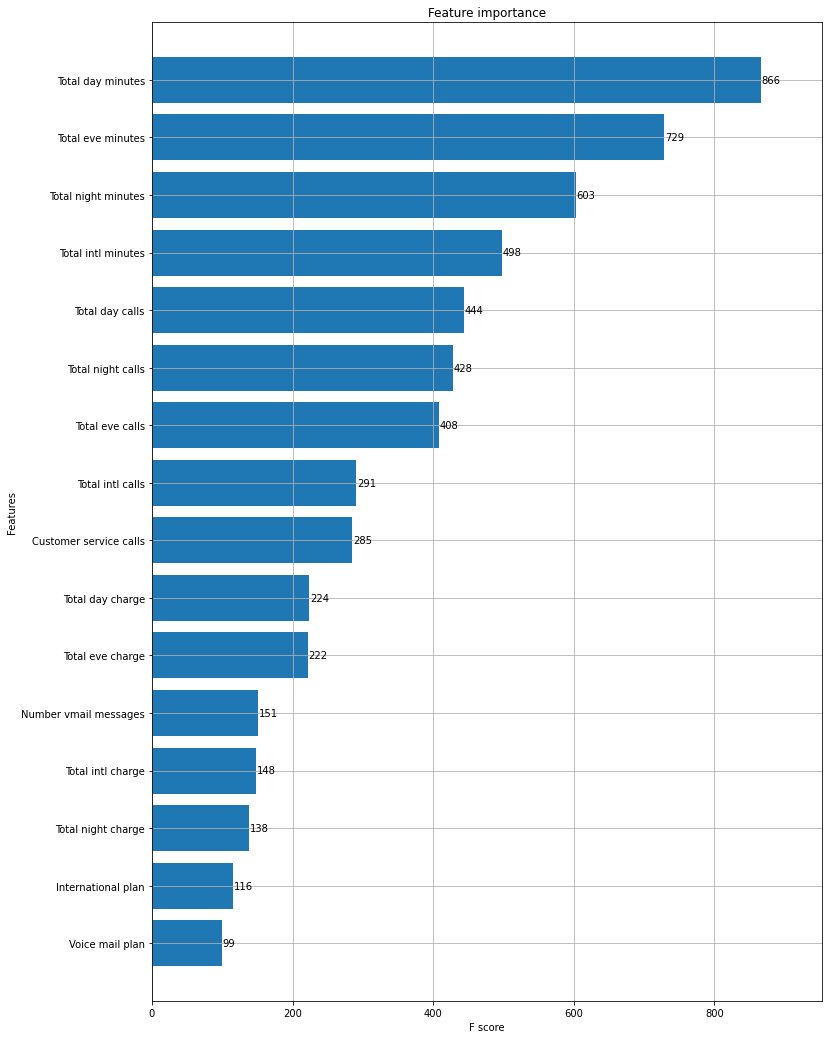

In [31]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(data, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [32]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
lr = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8589540412044374
auc 0.5328682781209835


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [33]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9318541996830428
auc 0.8523363323520876


## Feature Eng 🕹

In [34]:
data = pd.read_csv('/content/drive/MyDrive/AI Assignment/dataset.csv')
data.groupby('Churn').count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
False,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859,2859
True,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


In [35]:
#Encode Bool and cat
cate = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['bool', 'object']]
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [36]:
data = data.drop('Account length', 1)
data = data.drop('Area code', 1)
data = data.drop('State', 1) #Just for test reasons

In [37]:
cols_minutes = ['Total day minutes','Total night minutes','Total eve minutes']
data['Total Minutes'] = data[cols_minutes].sum(axis=1)

In [38]:
cols_calls = ['Total day calls','Total night calls','Total eve calls']
data['Total Calls'] = data[cols_calls].sum(axis=1)

In [39]:
cols_charge = ['Total day charge','Total night charge','Total eve charge']
data['Total Charge'] = data[cols_charge].sum(axis=1)

In [40]:
for col in cols_calls, cols_minutes, cols_charge:
  data = data.drop(col, 1)

In [41]:
cols = ['Number vmail messages', 'Total intl minutes','Total Minutes', 'Total Calls'] 

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [43]:
data.to_csv('x.csv')

In [44]:
y = data['Churn']
data = data.drop(['Churn'],axis=1)
xtrain, xvalid, ytrain, yvalid = train_test_split(data, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [45]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9508448540706606
auc 0.9130824372759857


In [46]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
xg = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9708141321044547
auc 0.9157706093189966


In [47]:
clf = GradientBoostingClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9769585253456221
auc 0.92831541218638


In [49]:
full_train = pd.concat([xtrain, ytrain], axis=1)
full_valid = pd.concat([xvalid, yvalid], axis=1)

In [50]:
xtrain.to_csv('xtrain_compacted.csv')
ytrain.to_csv('ytrain_compacted.csv')
xvalid.to_csv('xvalid_compacted.csv')
yvalid.to_csv('yvalid_compacted.csv')
full_train.to_csv('full_train_compacted.csv')
full_valid.to_csv('full_valid_compacted.csv')